# Laboratorio 8: Procesamiento EMG
#Parte 1: características de partes de la señal (usando windowing)

In [1]:
import numpy as np
#Importar librerías
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax
from scipy.integrate import cumtrapz
from scipy.signal import welch
import matplotlib.pyplot as plt
import numpy as np

# Archivo que contiene los datos
archivo = "C:\\Users\\romin\\ISB2024\\Nicole-04-12_10-15-28.txt"

# Leer los datos del archivo y omitir las primeras 7 líneas
datos = np.loadtxt(archivo, skiprows=7)

# Extraer la columna de interés (columna 6)
senal = datos[:, 5]

# Número de muestra
num_muestra = np.arange(len(senal))
# Conversión a V de la señal (según fórmula del Sensor user manual, disponible en: https://www.bitalino.com/storage/uploads/media/electromyography-emg-user-manual.pdf)
senalV = (((senal/1024)-1/2)*3.3)/1009
#Frecuencia de sampling usada en Bitalino
fs = 1000 
senalmV = senalV*fs # en mV
# Mostrar la señal
t = num_muestra/fs
#plt.plot(t, senalmV)
#plt.xlabel('Tiempo')
#plt.ylabel('EMG (mV)')
#plt.title('EMG')
#plt.grid(True)
#plt.show()

## Filtrado (Wavelet)
#### Basado en “Discrete wavelet transform based processing of embroidered textile-electrode electromyography signal acquired with load and pressure effect - Bulcha Belay Etana, Ahmed Ali Dawud, Benny Malengier, Wojciech Sitek, Wendimu Fanta Gemechu, Janarthanan Krishnamoorthy, Lieva Van Langenhove, 2024”. Consultado: el 17 de mayo de 2024. [En línea]. Disponible en: https://journals.sagepub.com/doi/10.1177/15280837241232449

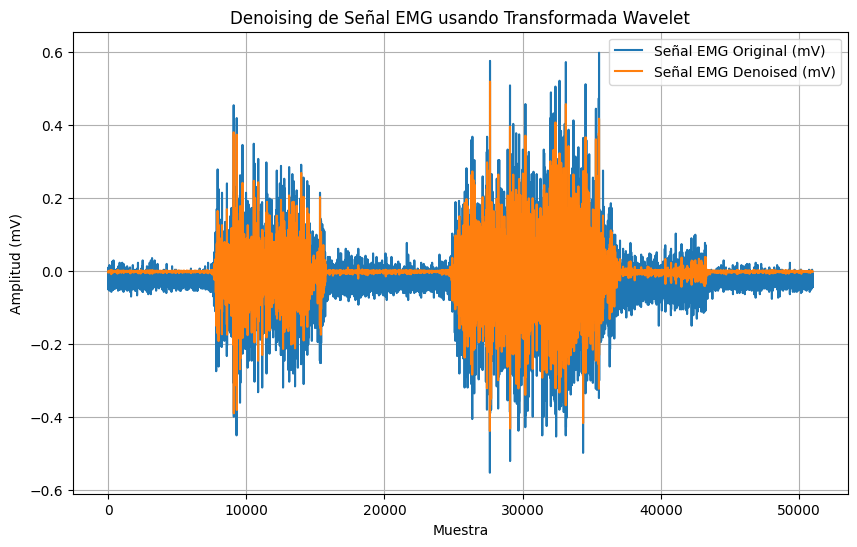

In [2]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Definir parámetros de la transformada wavelet
wavelet = 'sym5'  # Wavelet Symlet con 5 momentos de desaparición
level = 4  # Nivel de descomposición
mode = 'symmetric'  # Modo de extensión de señal

# Realizar la descomposición wavelet
coefficients = pywt.wavedec(senalmV, wavelet, level=level, mode=mode)

# Método de umbralización y valor de umbral
threshold_method = 'soft'  # Método de umbralización soft
threshold_value = 0.1  # Ajustar el valor del umbral según su señal y nivel de ruido

# Aplicar umbralización a los coeficientes de la wavelet
coefficients_thresh = [pywt.threshold(c, threshold_value, mode=threshold_method) for c in coefficients]

# Reconstruir la señal denoised
emg_denoised = pywt.waverec(coefficients_thresh, wavelet, mode=mode)

# Graficar la señal EMG original y denoised
plt.figure(figsize=(10, 6))
plt.plot(senalmV, label='Señal EMG Original (mV)')
plt.plot(emg_denoised, label='Señal EMG Denoised (mV)')
plt.xlabel('Muestra')
plt.ylabel('Amplitud (mV)')
plt.title('Denoising de Señal EMG usando Transformada Wavelet')
plt.legend()
plt.grid(True)
plt.show()

## Segmentación:
### Ventanas utilizando Gesture Detection Technique, una de las técnica de segmentación que se usó en:
##### Jaramillo, Andres & Benalcázar, Marco & Mena-Maldonado, Elisa. (2020). Real-Time Hand Gesture Recognition Using Surface Electromyography and Machine Learning: A Systematic Literature Review. Sensors. 20. 2467. 10.3390/s20092467. 

In [3]:
#Detección de activación muscular
import biosignalsnotebooks as bsnb
burst_begin, burst_end = bsnb.detect_emg_activations(emg_denoised, fs, smooth_level=20, threshold_level=0.5, time_units=True, plot_result=True)[:2]

#Number of muscular activations: 2

Ventana 1

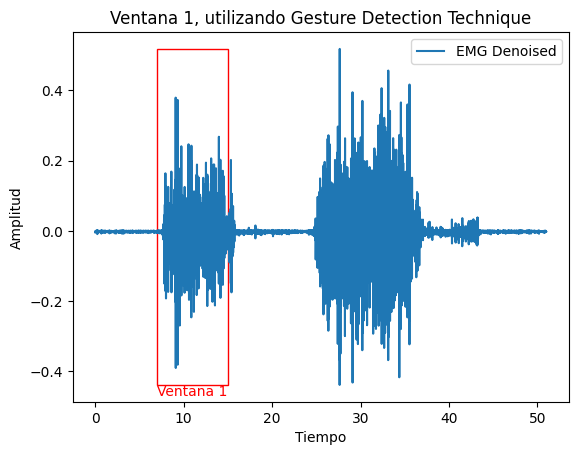

In [4]:
import matplotlib.pyplot as plt
import numpy as np

c=int(burst_begin[0])
d=int(burst_end[0])

# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar la señal EMG
ax.plot(t, emg_denoised, label='EMG Denoised')

# Dibujar el rectángulo
rect_height = np.max(emg_denoised) - np.min(emg_denoised)  # Altura del rectángulo igual a la amplitud de la señal EMG
rect = plt.Rectangle((c, np.min(emg_denoised)), d - c, rect_height, fill=False, edgecolor='red')
ax.add_patch(rect)

# Establecer etiquetas y leyendas
ax.set_xlabel('Tiempo')
ax.set_ylabel('Amplitud')
ax.set_title('Ventana 1, utilizando Gesture Detection Technique')
ax.legend()
ax.text(c + (d - c) / 2, np.min(emg_denoised), 'Ventana 1',color='red', ha='center', va='top')


# Mostrar la gráfica
plt.show()


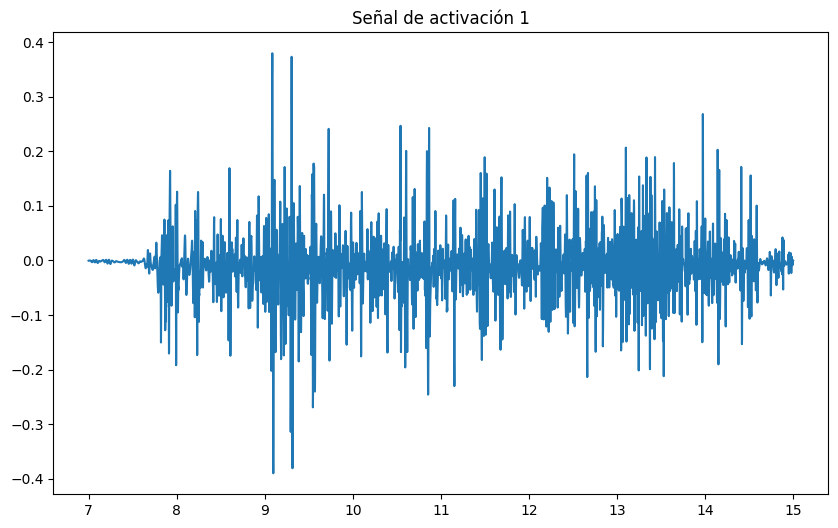

In [5]:
segmented_emg=emg_denoised[c*fs:d*fs]
n=len(segmented_emg)
t1 = np.linspace(c, d, n)
plt.figure(figsize=(10, 6))
plt.plot(t1,segmented_emg)
plt.title('Señal de activación 1')
plt.show()


##### Ventana 2

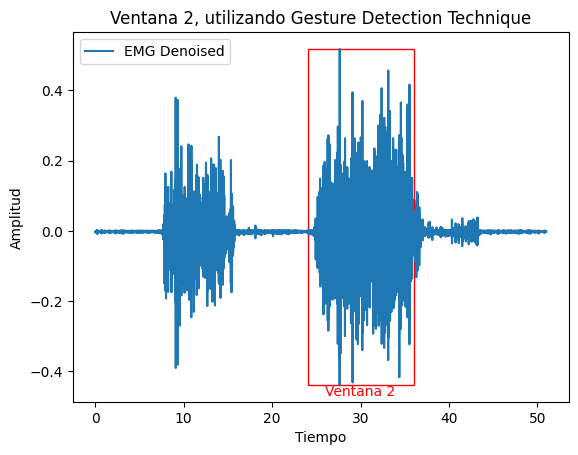

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# Definir los límites laterales del rectángulo 'a' y 'b'
a=int(burst_begin[1])
b=int(burst_end[1])
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar la señal EMG
ax.plot(t,emg_denoised, label='EMG Denoised')

# Dibujar el rectángulo
rect_height = np.max(emg_denoised) - np.min(emg_denoised)  # Altura del rectángulo igual a la amplitud de la señal EMG
rect = plt.Rectangle((a, np.min(emg_denoised)), b - a, rect_height, fill=False, edgecolor='red')
ax.add_patch(rect)

# Establecer etiquetas y leyendas
ax.set_xlabel('Tiempo')
ax.set_ylabel('Amplitud')
ax.set_title('Ventana 2, utilizando Gesture Detection Technique')
ax.legend()
ax.text(a + (b - a) / 2, np.min(emg_denoised), 'Ventana 2',color='red', ha='center', va='top')

# Mostrar la gráfica
plt.show()

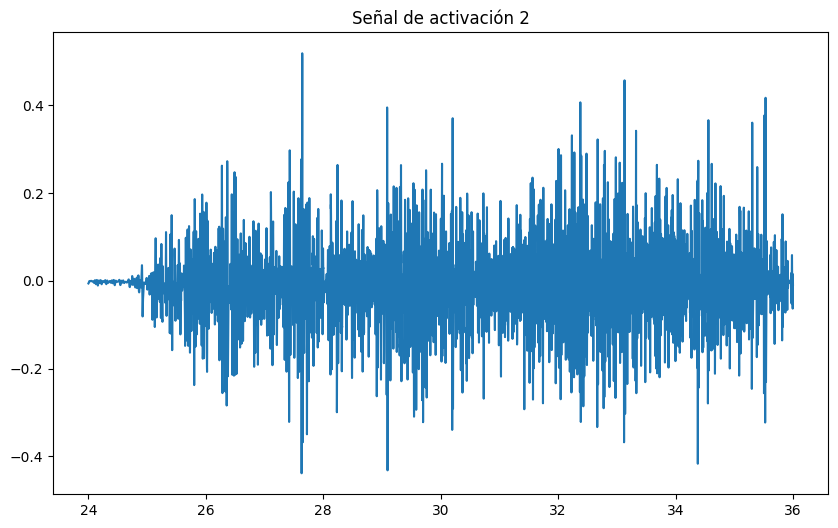

In [7]:

segmented_emg2=emg_denoised[a*fs:b*fs]
t2 = np.linspace(a, b, len(segmented_emg2))

plt.figure(figsize=(10, 6))
plt.plot(t2,segmented_emg2)
plt.title('Señal de activación 2')
plt.show()


## Extracción de características (para la primera señal de activación)


In [8]:
burst_begin, burst_end = bsnb.detect_emg_activations(segmented_emg, fs, smooth_level=20, threshold_level=0.5, time_units=True, plot_result=True)[:2]


In [9]:
# Bursts Duration
bursts_time = burst_end - burst_begin
print(burst_end)
# Parameter extraction
max_time = max(bursts_time)
min_time = min(bursts_time)
avg_time = average(bursts_time)
std_time = std(bursts_time)
print(f"Maximum time: {max_time}")
print(f"Minimum time: {min_time}")
print(f"Average time: {avg_time}")
print(f"Standard Deviation time: {std_time}")

[7.799975]
Maximum time: 7.163895486935868
Minimum time: 7.163895486935868
Average time: 7.163895486935868
Standard Deviation time: 0.0


In [10]:
# Max
max_sample_value = max(segmented_emg)

# Min
min_sample_value = min(segmented_emg)

# Average and Standard Deviation
avg_sample_value = average(segmented_emg)
std_sample_value = std(segmented_emg)

print(f"Maximum EMG: {max_sample_value}")
print(f"Minimum EMG: {min_sample_value}")
print(f"Average EMG: {avg_sample_value}")
print(f"Standard Deviation EMG: {std_sample_value}")

Maximum EMG: 0.3794928824067344
Minimum EMG: -0.39002821716421787
Average EMG: -0.010437003976578239
Standard Deviation EMG: 0.057175311441171814


In [11]:
bsnb.plot_emg_graphical_statistical(t1, segmented_emg, max_sample_value, min_sample_value, avg_sample_value, std_sample_value)

## Características usadas en los artículos:
#### “Discrete wavelet transform based processing of embroidered textile-electrode electromyography signal acquired with load and pressure effect - Bulcha Belay Etana, Ahmed Ali Dawud, Benny Malengier, Wojciech Sitek, Wendimu Fanta Gemechu, Janarthanan Krishnamoorthy, Lieva Van Langenhove, 2024”. Consultado: el 17 de mayo de 2024. [En línea]. Disponible en: https://journals.sagepub.com/doi/10.1177/15280837241232449
#### H. Jebelli y S. Lee, «Feasibility of Wearable Electromyography (EMG) to Assess Construction Workers’ Muscle Fatigue: Proceedings of the 35th CIB W78 2018 Conference: IT in Design, Construction, and Management», 2019, pp. 181-187. doi: 10.1007/978-3-030-00220-6_22. Consultado: el 18 de mayo de 2024. [En línea]. Disponible en: https://www.researchgate.net/figure/The-values-of-MAV-RMS-MEF-and-MDF-for-bicep-muscle_fig3_328141269

In [12]:
rms_value = np.sqrt(np.mean(np.square(segmented_emg)))
print(f"El valor RMS de la señal EMG es: {rms_value}")

# Area under the curve
area = cumtrapz(segmented_emg)
bsnb.plot_emg_rms_area(t1, segmented_emg, rms_value, area)

El valor RMS de la señal EMG es: 0.05812011089461291


In [13]:
mav_value = np.mean(np.abs(segmented_emg))
print(f"El valor MAV de la señal EMG es: {mav_value}")

El valor MAV de la señal EMG es: 0.03804653354994741


In [14]:
# Calcular la FFT de la señal
N = len(segmented_emg)
freqs = np.fft.rfftfreq(N, 1/fs)
fft_magnitude = np.abs(np.fft.rfft(segmented_emg))

# Calcular el espectro de potencia
power_spectrum = fft_magnitude**2

# Calcular la potencia acumulada
cumulative_power = np.cumsum(power_spectrum)

# Encontrar la frecuencia mediana
total_power = cumulative_power[-1]
median_freq_index = np.where(cumulative_power >= total_power / 2)[0][0]
MDF = freqs[median_freq_index]
print(f"Frecuencia mediana (MDF): {MDF} Hz")

# Calcular la frecuencia media (MNF)
MNF = np.sum(freqs * power_spectrum) / np.sum(power_spectrum)
print(f"Frecuencia media (MNF): {MNF} Hz")

Frecuencia mediana (MDF): 44.75 Hz
Frecuencia media (MNF): 48.826105225170984 Hz


## Características usadas en el artículo:
#### J. M. L. Villagómez, R. I. M. Chávez, J. M. L. Hernández and C. Rodriguez-Donate, "Hand movement classification by time domain feature extraction in EMG signals," 2023 IEEE International Autumn Meeting on Power, Electronics and Computing (ROPEC), Ixtapa, Mexico, 2023, pp. 1-6, doi: 10.1109/ROPEC58757.2023.10409406.

In [15]:
from scipy.stats import kurtosis

# Calcular la curtosis de la señal EMG
emg_kurtosis = kurtosis(segmented_emg)
print(f"Curtosis de la señal EMG: {emg_kurtosis}")

Curtosis de la señal EMG: 5.83177099732856


In [16]:
from scipy.stats import skew

# Calcular la asimetría de la señal EMG
emg_skewness = skew(segmented_emg)
print(f"Asimetría (skewness) de la señal EMG: {emg_skewness}")

Asimetría (skewness) de la señal EMG: 0.06924344627766076


### Otras características (mencionadas en Jaramillo, Andres & Benalcázar, Marco & Mena-Maldonado, Elisa. (2020). Real-Time Hand Gesture Recognition Using Surface Electromyography and Machine Learning: A Systematic Literature Review. Sensors. 20. 2467. 10.3390/s20092467.)

In [17]:
iemg_value = np.sum(np.abs(segmented_emg))
print(f"El valor iEMG de la señal EMG es: {iemg_value}")

El valor iEMG de la señal EMG es: 304.37226839957924


In [18]:
WL = len(segmented_emg)
print("Longitud de la forma de onda (WL):", WL)
ZC = np.sum(np.diff(np.sign(segmented_emg)) != 0)
print("Cruces por cero (ZC):", ZC)
SSC = np.sum(np.diff(np.sign(np.diff(segmented_emg))) != 0)
print("Cambios en el signo de la pendiente (SSC):", SSC)

Longitud de la forma de onda (WL): 8000
Cruces por cero (ZC): 751
Cambios en el signo de la pendiente (SSC): 1089


In [19]:
# Signal Power Spectrum
f, P = welch(segmented_emg, fs=fs, window='hanning', noverlap=0, nfft=int(256.))

# Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
area_freq = cumtrapz(P, f, initial=0)
total_power = area_freq[-1]
median_freq = f[where(area_freq >= total_power / 2)[0][0]]
f_max = f[argmax(P)]
print("Total power:", total_power)
bsnb.plot_emg_spect_freq(f, P, f_max, median_freq)

Total power: 0.0027896710970607926


## Extracción de características (para la segunda señal de activación)

In [20]:
burst_begin, burst_end = bsnb.detect_emg_activations(segmented_emg2, fs, smooth_level=20, threshold_level=0.5, time_units=True, plot_result=True)[:2]


In [21]:
# Bursts Duration
bursts_time = burst_end - burst_begin
print(burst_end)
# Parameter extraction
max_time = max(bursts_time)
min_time = min(bursts_time)
avg_time = average(bursts_time)
std_time = std(bursts_time)
print(f"Maximum time: {max_time}")
print(f"Minimum time: {min_time}")
print(f"Average time: {avg_time}")
print(f"Standard Deviation time: {std_time}")

[11.79998333]
Maximum time: 10.845903825318777
Minimum time: 10.845903825318777
Average time: 10.845903825318777
Standard Deviation time: 0.0


In [22]:
# Max
max_sample_value = max(segmented_emg2)

# Min
min_sample_value = min(segmented_emg2)

# Average and Standard Deviation
avg_sample_value = average(segmented_emg2)
std_sample_value = std(segmented_emg2)

print(f"Maximum EMG: {max_sample_value}")
print(f"Minimum EMG: {min_sample_value}")
print(f"Average EMG: {avg_sample_value}")
print(f"Standard Deviation EMG: {std_sample_value}")

Maximum EMG: 0.5181613974360016
Minimum EMG: -0.4382966900396984
Average EMG: -0.01168000821912256
Standard Deviation EMG: 0.08557475881327573


In [23]:
bsnb.plot_emg_graphical_statistical(t2, segmented_emg2, max_sample_value, min_sample_value, avg_sample_value, std_sample_value)

In [24]:
rms_value = np.sqrt(np.mean(np.square(segmented_emg2)))
print(f"El valor RMS de la señal EMG es: {rms_value}")

# Area under the curve
area = cumtrapz(segmented_emg2)
bsnb.plot_emg_rms_area(t2, segmented_emg2, rms_value, area)

El valor RMS de la señal EMG es: 0.08636817665059904


In [25]:
mav_value = np.mean(np.abs(segmented_emg2))
print(f"El valor MAV de la señal EMG es: {mav_value}")

El valor MAV de la señal EMG es: 0.06119978696003991


In [26]:
# Calcular la FFT de la señal
N = len(segmented_emg2)
freqs = np.fft.rfftfreq(N, 1/fs)
fft_magnitude = np.abs(np.fft.rfft(segmented_emg2))

# Calcular el espectro de potencia
power_spectrum = fft_magnitude**2

# Calcular la potencia acumulada
cumulative_power = np.cumsum(power_spectrum)

# Encontrar la frecuencia mediana
total_power = cumulative_power[-1]
median_freq_index = np.where(cumulative_power >= total_power / 2)[0][0]
MDF = freqs[median_freq_index]
print(f"Frecuencia mediana (MDF): {MDF} Hz")

# Calcular la frecuencia media (MNF)
MNF = np.sum(freqs * power_spectrum) / np.sum(power_spectrum)
print(f"Frecuencia media (MNF): {MNF} Hz")

Frecuencia mediana (MDF): 54.58333333333333 Hz
Frecuencia media (MNF): 60.831697318632344 Hz


In [27]:
from scipy.stats import kurtosis

# Calcular la curtosis de la señal EMG
emg_kurtosis = kurtosis(segmented_emg2)
print(f"Curtosis de la señal EMG: {emg_kurtosis}")

Curtosis de la señal EMG: 2.5818909331640176


In [28]:
from scipy.stats import skew

# Calcular la asimetría de la señal EMG
emg_skewness = skew(segmented_emg2)
print(f"Asimetría (skewness) de la señal EMG: {emg_skewness}")

Asimetría (skewness) de la señal EMG: 0.19757860998593374


In [29]:
iemg_value = np.sum(np.abs(segmented_emg2))
print(f"El valor iEMG de la señal EMG es: {iemg_value}")

El valor iEMG de la señal EMG es: 734.3974435204789


In [30]:
WL = len(segmented_emg2)
print("Longitud de la forma de onda (WL):", WL)

Longitud de la forma de onda (WL): 12000


In [31]:
ZC = np.sum(np.diff(np.sign(segmented_emg2)) != 0)
print("Cruces por cero (ZC):", ZC)
SSC = np.sum(np.diff(np.sign(np.diff(segmented_emg2))) != 0)
print("Cambios en el signo de la pendiente (SSC):", SSC)

Cruces por cero (ZC): 1370
Cambios en el signo de la pendiente (SSC): 2002


In [32]:
# Signal Power Spectrum
f, P = welch(segmented_emg2, fs=fs, window='hanning', noverlap=0, nfft=int(256.))

# Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
area_freq = cumtrapz(P, f, initial=0)
total_power = area_freq[-1]
median_freq = f[where(area_freq >= total_power / 2)[0][0]]
f_max = f[argmax(P)]
print("Total power:", total_power)
bsnb.plot_emg_spect_freq(f, P, f_max, median_freq)

Total power: 0.00727294758012773
